# KELOMPOK 9

***Anggota Kelompok***
1. 3337210002 Ahmad Jumhadi
2. 3337210022 Raka Adi Prasetya
3. 3337210063 A’idah Eka Septiana

***Perintah*** 

Lakukan training data (pisahkan data training dan data uji) dan lakukan prediksi “apakah besok akan hujan” berdasarkan dari model yang telah dibuat.

***Metode SVM***

Support   Vector   Machine (SVM) adalah  teknik  yang  relatif  baru  untuk  melakukan prediksi,  baik  dalam  kasus  klasifikasi  maupun regresi.  Support Vector Machine masuk  kelas supervised learning, dimana dalam implementasinya  perlu  adanya  tahap  pelatihan menggunakan sequential   training   SVMdan disusul tahap pengujian (Santosa, 2015). Konsep  klasifikasi  dengan  Support Vector Machine   adalah   mencari hyperplane terbaik yang berfungsi sebagai pemisah dua kelas data. Support  Vector  Machine  mampu  bekerja  pada dataset     yang     berdimensi     tinggi     dengan menggunakan    kernel    trik.    Support    Vector Machine   hanya   menggunakan   beberapa   titik data terpilih yang berkontribusi (support vector) untuk  membentuk  model  yang  akan  digunakan dalam    proses    klasifikasi.

***Dataset***

https://www.kaggle.com/datasets/filhypedeeplearning/australia-rain-tomorrow


***Informasi Atribut***
1. `Date` - Tanggal observasi
2. `Location` - Lokasi observasi
3. `MinTemp` - Suhu minimum dalam 24 jam hingga 9 pagi.
4. `MaxTemp` - Suhu maksimum dalam 24 jam dari jam 9 pagi. 
5. `Rainfall` - Curah hujan (curah hujan) dalam 24 jam sampai jam 9 pagi.
6. `Evaporation` - Evaporasi dari "Kelas A" dalam 24 jam, hingga jam 9 pagi.
7. `Sunshine` - Sinar matahari cerah dalam 24 jam hingga tengah malam.
8. `WindGustDir` - Arah hembusan angin terkuat dalam 24 jam hingga tengah malam.
9. `WindGustSpeed` - Kecepatan hembusan angin terkuat dalam 24 jam hingga tengah malam.
10. `WindDir9am` - Arah angin rata-rata lebih dari 10 menit sebelum jam 9 pagi.
11. `WindDir3pm` - Arah hembusan angin pada pukul 15.00 WIB.
12. `WindSpeed9am` - Kecepatan angin (dalam kilometer per jam) rata-rata lebih dari 10 menit sebelum jam 9 pagi.
13. `WindSpeed3pm` - Kecepatan angin (dalam kilometer per jam) rata-rata lebih dari 10 menit sebelum jam 3 sore.
14. `Humidity9am` - Kelembaban relatif (dalam persen) pada jam 9 pagi.
15. `Humidity3pm` - Kelembaban relatif (dalam persen) pada pukul 3 sore.
16. `Pressure9am` - Tekanan atmosfer (hpa) berkurang menjadi permukaan laut rata-rata pada pukul 9 pagi.
17. `Pressure3pm` - Tekanan atmosfer (hpa) berkurang menjadi permukaan laut rata-rata pada pukul 3 sore.
18. `Cloud9am` - Bagian langit yang tertutup awan pada pukul 09.00. Ini diukur dalam ”oktas”, yang merupakan satuan per delapan. Ini mencatat berapa perdelapan langit tertutup awan. Ukuran 0 menunjukkan langit yang benar-benar cerah, sedangkan angka 8 menunjukkan bahwa langit benar-benar mendung.
19. `Cloud3pm` - Bagian langit yang tertutup awan pada pukul 15.00. lihat Cloud9am untuk deskripsi nilai.
20. `Temp9am` - Suhu (C) pada jam 9 pagi.
21. `Temp3pm` - Suhu (C) pada pukul 3 sore.
22. `RainToday` - Prediksi apakah hari ini hujan: Nilai 1 jika curah hujan (dalam milimeter) pada 24 jam sampai jam 9 pagi melebihi 1 mm, jika tidak maka 0.
23. `RISK_MM` - Variabel target kontinu, jumlah hujan yang tercatat pada hari berikutnya.
24. `RainTomorrow` - Variabel target biner apakah hujan atau tidak pada hari berikutnya.

# Import Libraries yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import pickle

# Data Loading

In [2]:
weather_data = pd.read_csv("australia_rain_tomorrow_raw.csv")
pd.set_option("display.max_columns", 24)

In [3]:
df = weather_data.copy()

In [4]:
# Menampilkan 5 data pertama
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
# Menampilkan 5 data terakhir
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,20/06/2017,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [6]:
# Memeriksa ukuran dari dataset (jumlah baris, jumlah kolom)
df.shape

(142193, 24)

In [7]:
# Ringkasan dataset (tipe masing-masing kolom pada data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

# Data Cleaning

In [8]:
# Memeriksa adanya duplikasi dalam data
df.duplicated().sum()

0

In [9]:
# Membuat dataframe jumlah missing values dan persentasenya
nan_sum = df.isnull().sum()
nan_sum_percentage = np.asarray((nan_sum/len(df))*100)
nan_sum = pd.DataFrame(nan_sum)
nan_sum.rename(columns={0:"nan_sum"}, inplace=True)
nan_sum["percentage"] = nan_sum_percentage

nan_sum

,nan_sum,percentage
Date,0,0.000000
Location,0,0.000000
MinTemp,637,0.447983
MaxTemp,322,0.226453
Rainfall,1406,0.988797
Evaporation,60843,42.789026
Sunshine,67816,47.692924
WindGustDir,9330,6.561504
WindGustSpeed,9270,6.519308
WindDir9am,10013,7.041838


<Axes: >

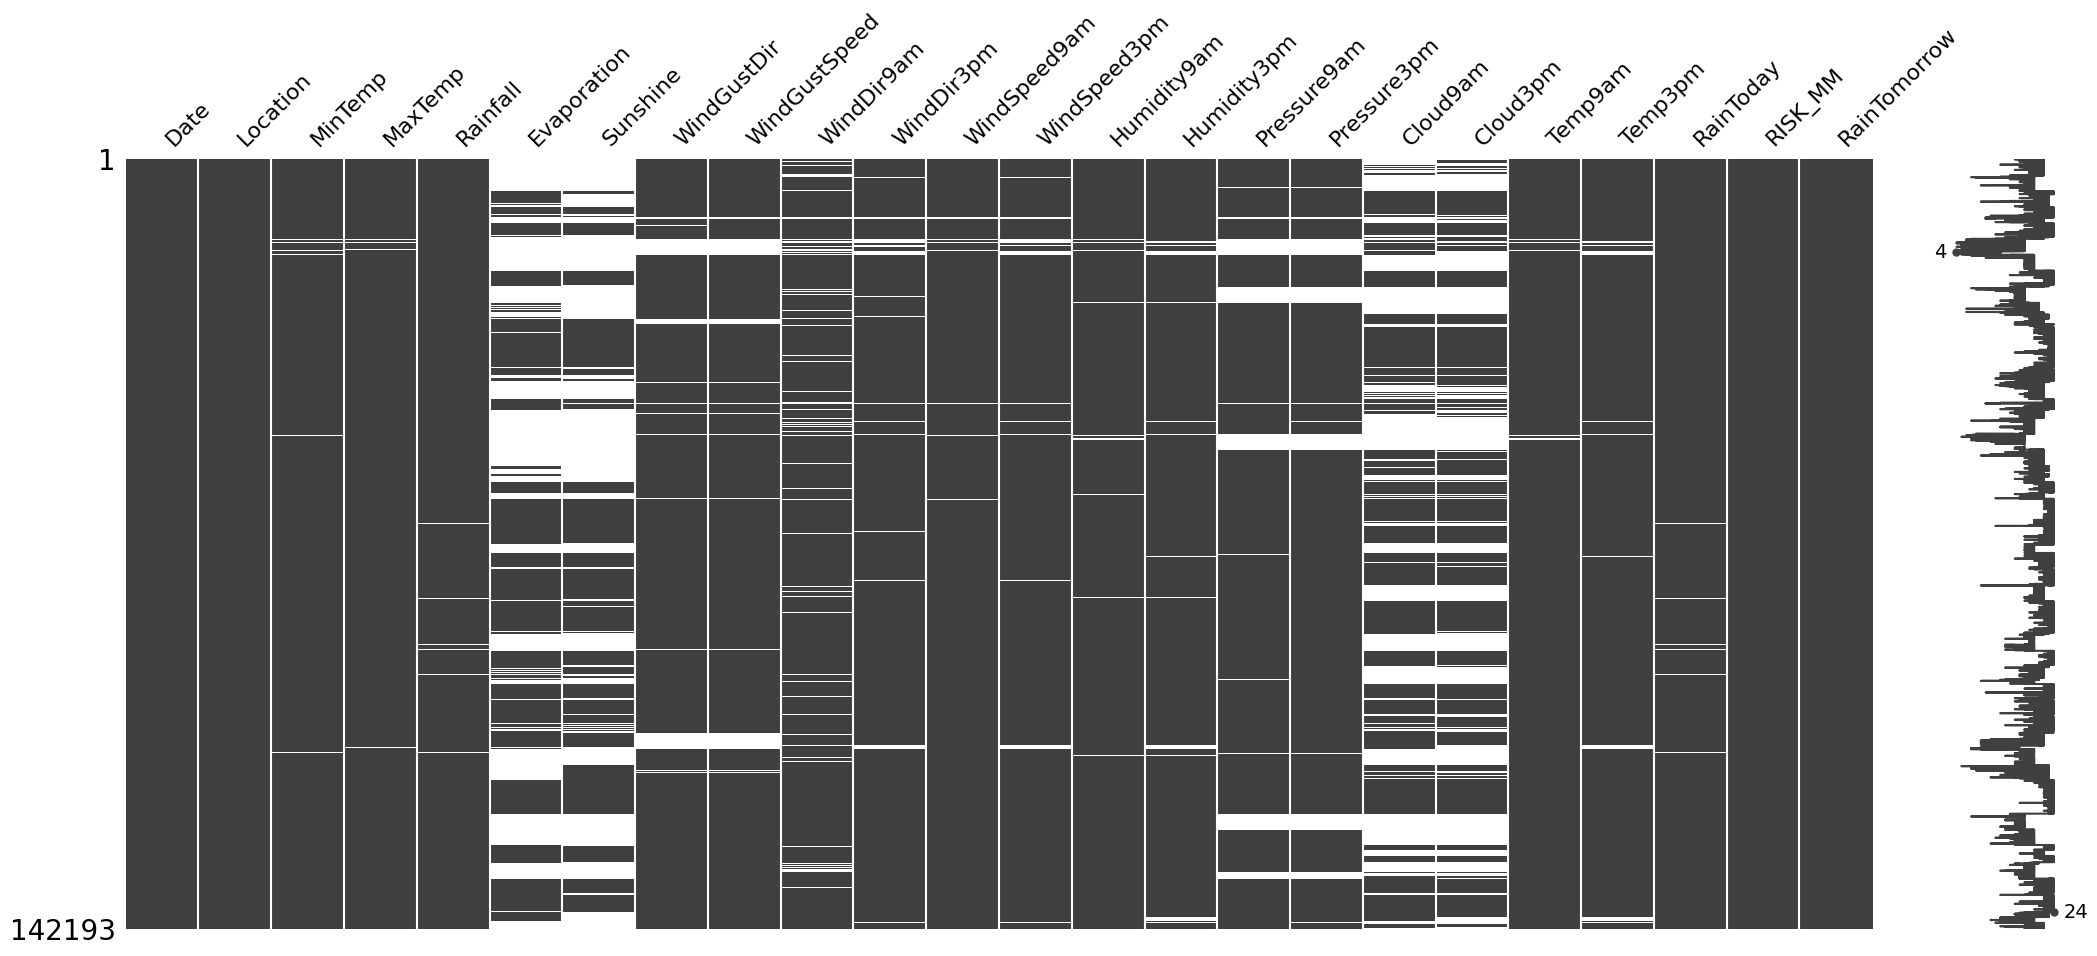

In [10]:
msno.matrix(df)

In [11]:
# Memisahkan kolom kategorik dan numerik
categorical = [cols for cols in df.columns if df[cols].dtypes=='object']
numerical = [cols for cols in df.columns if df[cols].dtypes=='float64']

In [12]:
# Mengisi missing values setiap kolom dengan moving average (rolling)
for cols in numerical:
    if df[cols].isnull().sum() != 0:
        while True:
            df[cols] = df[cols].fillna(df[cols].rolling(min_periods = 1, window = 7, center=True).mean())
            if df[cols].isnull().sum() == 0:
                    break

In [13]:
# Memeriksa kembali apakah masih terdapat missing values
nan_sum = df.isnull().sum()
nan_sum_percentage = np.asarray((nan_sum/len(df))*100)
nan_sum = pd.DataFrame(nan_sum)
nan_sum.rename(columns={0:"nan_sum"}, inplace=True)
nan_sum["percentage"] = nan_sum_percentage

nan_sum

,nan_sum,percentage
Date,0,0.000000
Location,0,0.000000
MinTemp,0,0.000000
MaxTemp,0,0.000000
Rainfall,0,0.000000
Evaporation,0,0.000000
Sunshine,0,0.000000
WindGustDir,9330,6.561504
WindGustSpeed,0,0.000000
WindDir9am,10013,7.041838


In [14]:
# Menghilangkan missing values pada kolom RainToday dan RainTomorrow
df.dropna(subset=['RainToday','RainTomorrow'], axis=0, inplace=True)

In [15]:
# Menghilangkan missing values pada kolom kategorik lain karena mengandung <10% missing values
df.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm'], axis=0, inplace=True)

In [16]:
# Memeriksa kembali apakah masih terdapat missing values
nan_sum = df.isnull().sum()
nan_sum_percentage = np.asarray((nan_sum/len(df))*100)
nan_sum = pd.DataFrame(nan_sum)
nan_sum.rename(columns={0:"nan_sum"}, inplace=True)
nan_sum["percentage"] = nan_sum_percentage

nan_sum

,nan_sum,percentage
Date,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0


In [17]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [18]:
# Mengubah format kolom Date menjadi datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
# Membuat kolom baru 
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

In [19]:
# Memeriksa kembali ringkasan dataset (tipe masing-masing kolom pada data dan jumlah baris/kolom)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123710 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           123710 non-null  datetime64[ns]
 1   Location       123710 non-null  object        
 2   MinTemp        123710 non-null  float64       
 3   MaxTemp        123710 non-null  float64       
 4   Rainfall       123710 non-null  float64       
 5   Evaporation    123710 non-null  float64       
 6   Sunshine       123710 non-null  float64       
 7   WindGustDir    123710 non-null  object        
 8   WindGustSpeed  123710 non-null  float64       
 9   WindDir9am     123710 non-null  object        
 10  WindDir3pm     123710 non-null  object        
 11  WindSpeed9am   123710 non-null  float64       
 12  WindSpeed3pm   123710 non-null  float64       
 13  Humidity9am    123710 non-null  float64       
 14  Humidity3pm    123710 non-null  float64       
 15  Press

# Eksplorasi Analisis Data

In [20]:
pd.set_option("display.max_columns", 26)

In [21]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,8.000000,2.0,16.9,21.8,0,0.0,0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,7.500000,5.0,17.2,24.3,0,0.0,0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,7.500000,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,5.333333,5.0,18.1,26.5,0,1.0,0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,7.000000,8.0,17.8,29.7,0,0.2,0,2008,12,5


In [22]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
142188,2017-06-20,Uluru,3.5,21.8,0.0,6.4,10.7,E,31.0,ESE,E,15.0,13.0,...,27.0,1024.7,1021.2,3.0,7.0,9.4,20.9,0,0.0,0,2017,6,20
142189,2017-06-21,Uluru,2.8,23.4,0.0,6.4,10.7,E,31.0,SE,ENE,13.0,11.0,...,24.0,1024.6,1020.3,3.0,4.5,10.1,22.4,0,0.0,0,2017,6,21
142190,2017-06-22,Uluru,3.6,25.3,0.0,6.4,10.7,NNW,22.0,SE,N,13.0,9.0,...,21.0,1023.5,1019.1,3.0,2.0,10.9,24.5,0,0.0,0,2017,6,22
142191,2017-06-23,Uluru,5.4,26.9,0.0,6.4,10.7,N,37.0,SE,WNW,9.0,9.0,...,24.0,1021.0,1016.8,3.0,2.0,12.5,26.1,0,0.0,0,2017,6,23
142192,2017-06-24,Uluru,7.8,27.0,0.0,6.4,10.7,SE,28.0,SSE,N,13.0,7.0,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0.0,0,2017,6,24


## Frekuensi nilai pada kolom `RainTomorrow`

In [23]:
df['RainTomorrow'].value_counts()

RainTomorrow
0    96318
1    27392
Name: count, dtype: int64

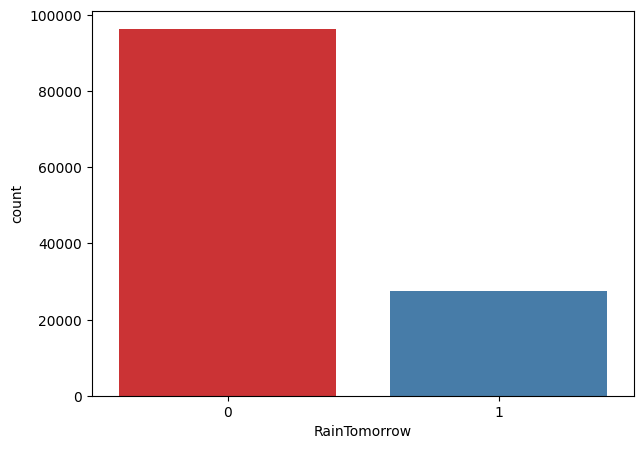

In [24]:
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

## Statistik Deskriptif dan Analisis Persebaran Parameter Numerik

In [25]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
count,123710,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,2013-04-19 03:45:49.106781952,12.416223,23.477200,2.375661,6.579938,7.926909,40.685280,15.011689,19.174578,67.654770,50.763799,1017.237067,1014.867764,4.596462,4.584806,17.249693,21.930116,0.224363,2.323461,0.221421,2012.806111,6.431824,15.709781
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,2011-01-31 00:00:00,7.800000,18.100000,0.000000,2.800000,5.400000,31.000000,9.000000,13.000000,56.000000,35.000000,1012.600000,1010.100000,2.000000,2.000000,12.500000,16.700000,0.000000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,2013-06-20 00:00:00,12.200000,23.000000,0.000000,5.400000,8.400000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.100000,1014.800000,5.000000,5.000000,16.900000,21.500000,0.000000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,2015-06-29 00:00:00,17.100000,28.600000,0.800000,8.400000,11.200000,48.000000,20.000000,24.000000,82.000000,65.000000,1021.900000,1019.600000,7.000000,7.000000,21.900000,26.900000,0.000000,0.600000,0.000000,2015.000000,9.000000,23.000000
max,2017-06-25 00:00:00,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,371.000000,1.000000,2017.000000,12.000000,31.000000
std,NaN,6.369351,7.208249,8.528039,6.268998,3.769802,13.388636,8.307285,8.571039,19.163859,20.980158,7.065449,7.017343,2.788185,2.631481,6.500858,7.041912,0.417164,8.427537,0.415205,2.528473,3.475113,8.788908


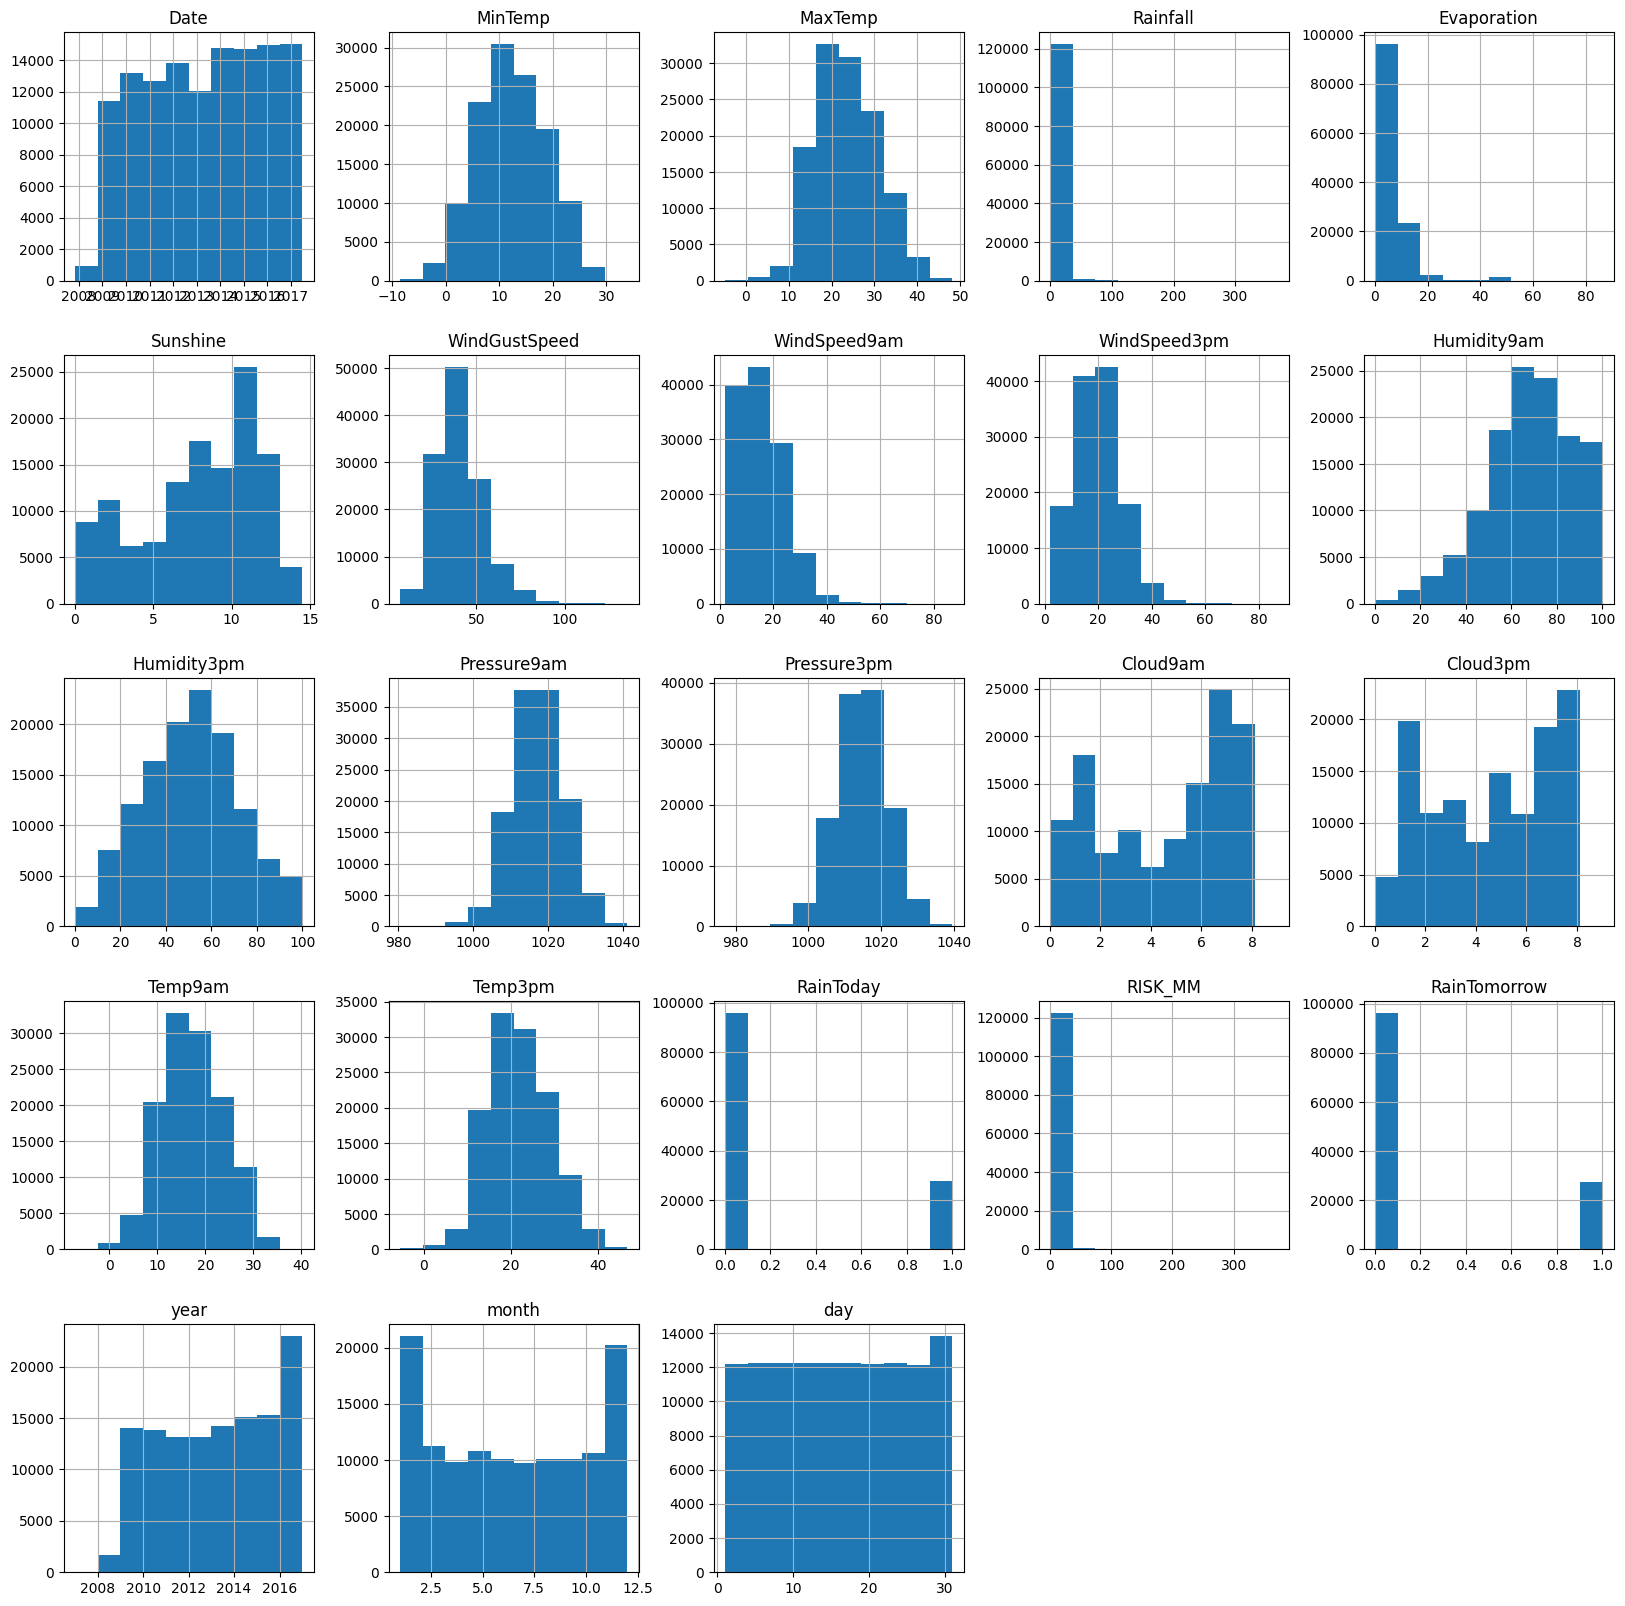

In [26]:
df.hist(figsize=(20, 20))
plt.show()

## Persebaran lokasi berlandaskan terjadinya hujan atau tidak

In [27]:
df_rain_by_loc = df.groupby('Location').count()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head(10)

,RainToday
Location,
Adelaide,2746
Albury,2445
AliceSprings,2748
BadgerysCreek,2458
Ballarat,2895
Bendigo,2725
Brisbane,3029
Cairns,2900
Canberra,2762


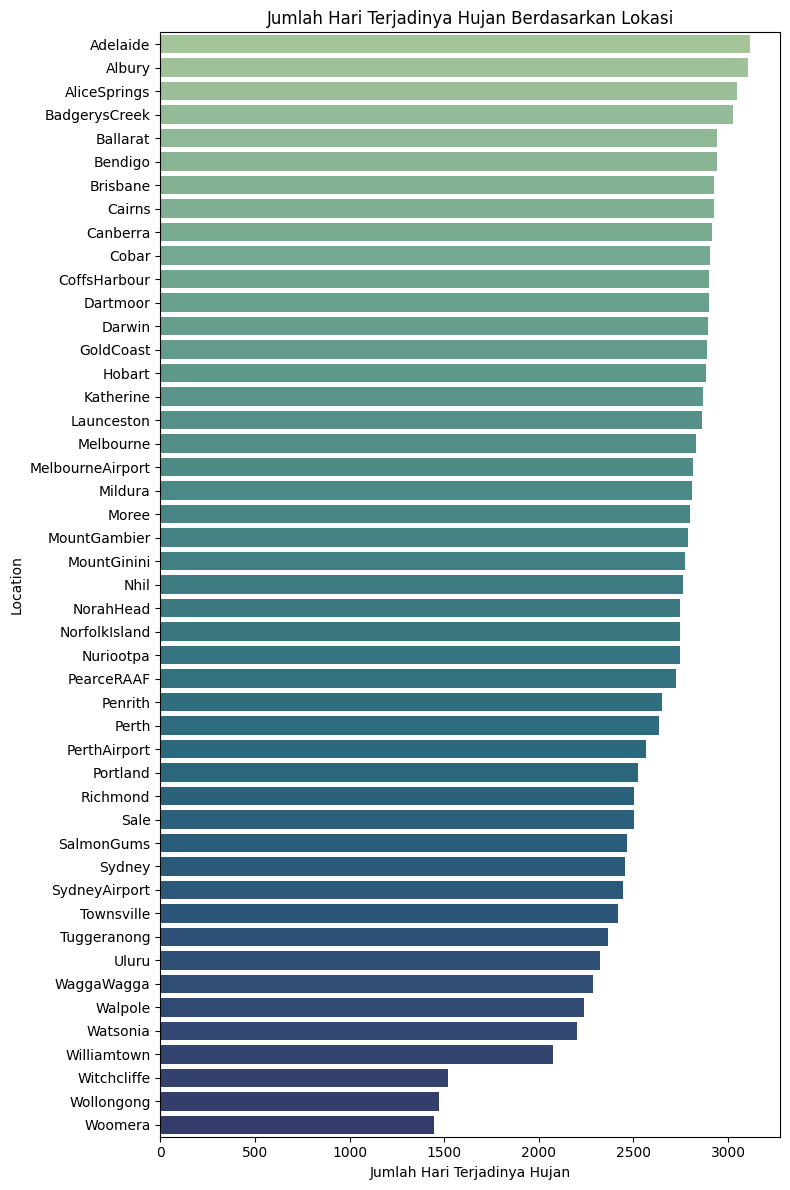

In [28]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=df_rain_by_loc.index, 
            data=df_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Jumlah Hari Terjadinya Hujan')
plt.title('Jumlah Hari Terjadinya Hujan Berdasarkan Lokasi')
plt.tight_layout()

## Pola curah hujan didasarkan pada waktu turunnya hujan per bulan 

In [29]:
df_seasonality = df.copy()
df_seasonality.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,8.000000,2.0,16.9,21.8,0,0.0,0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,7.500000,5.0,17.2,24.3,0,0.0,0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,7.500000,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,5.333333,5.0,18.1,26.5,0,1.0,0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,7.000000,8.0,17.8,29.7,0,0.2,0,2008,12,5


In [30]:
df_seasonality_grouped = df_seasonality.groupby('month').count()
df_seasonality_grouped = df_seasonality_grouped[['RainToday']]

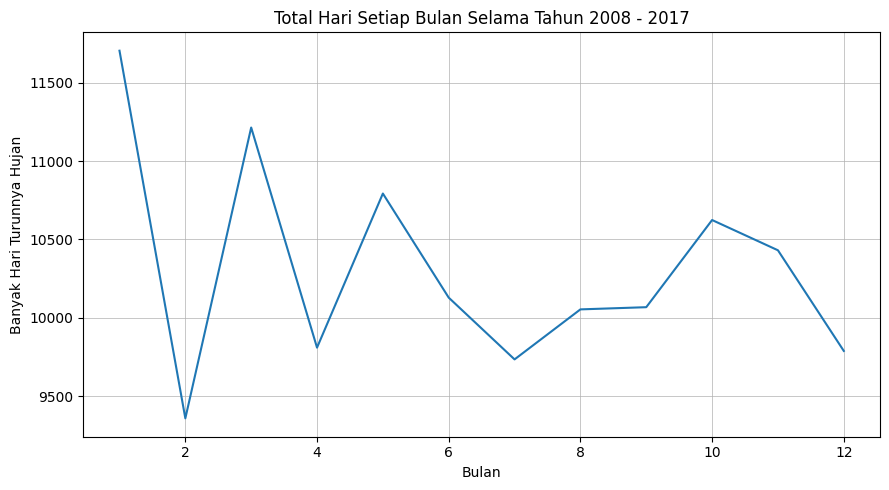

In [31]:
plt.figure(figsize=(9,5))
sns.lineplot(data=df_seasonality_grouped, x=df_seasonality_grouped.index, y='RainToday')
plt.title('Total Hari Setiap Bulan Selama Tahun 2008 - 2017')
plt.xlabel('Bulan')
plt.ylabel('Banyak Hari Turunnya Hujan')
plt.grid(linewidth=0.5)
plt.tight_layout()

## Intensitas hujan berdasarkan arah angin

In [32]:
df_categorical = df[['RainTomorrow','WindGustDir','WindDir9am','WindDir3pm']]
df_categorical = df_categorical[df_categorical['RainTomorrow']==1]
df_categorical.head()


,RainTomorrow,WindGustDir,WindDir9am,WindDir3pm
8,1,NNW,SE,NW
10,1,N,SSE,ESE
11,1,NNE,NE,ENE
12,1,W,NNW,NNW
15,1,ENE,SSW,E


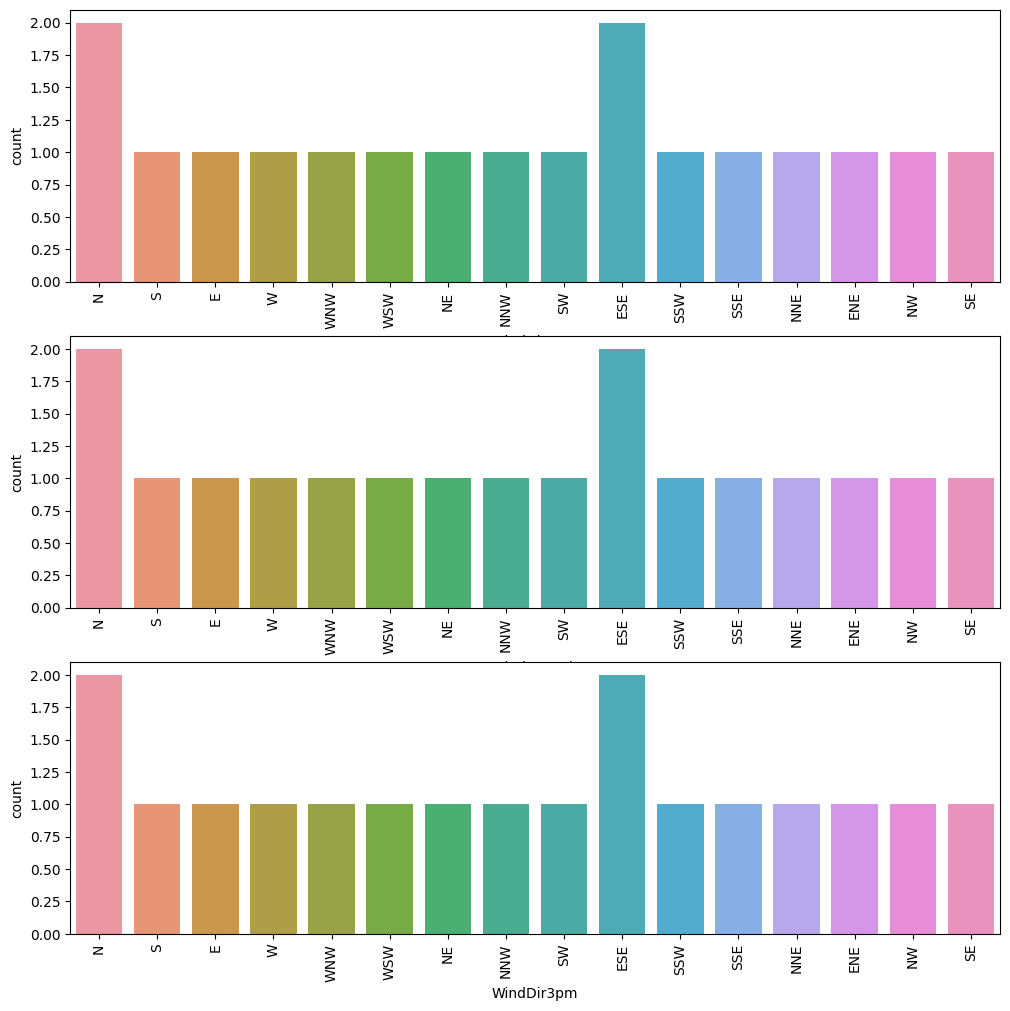

In [33]:
df_categorical = pd.DataFrame({
    'WindDir9am': ['N', 'S', 'E', 'W', 'N', 'WNW', 'WSW', 'NE', 'NNW', 'SW', 'ESE', 'SSW', 'SSE', 'NNE', 'ESE', 'ENE', 'NW', 'SE'],
    'WindGustDir': ['N', 'S', 'E', 'W', 'N', 'WNW', 'WSW', 'NE', 'NNW', 'SW', 'ESE', 'SSW', 'SSE', 'NNE', 'ESE', 'ENE', 'NW', 'SE'],
    'WindDir3pm': ['N', 'S', 'E', 'W', 'N', 'WNW', 'WSW', 'NE', 'NNW', 'SW', 'ESE', 'SSW', 'SSE', 'NNE', 'ESE', 'ENE', 'NW', 'SE']
})

categoricalPlot = ['WindDir9am', 'WindGustDir', 'WindDir3pm']
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
c = 0
while c <= 2:
    sns.countplot(x=df_categorical[categoricalPlot[c]], ax=ax[c])
    ax[c].set_xticklabels(ax[c].get_xticklabels(), rotation=90)
    c += 1
plt.show()

## Persebaran kolom numeric berdasarkan kolom target

Text(0.5, 1.0, 'Histogram Kolom Numerik')

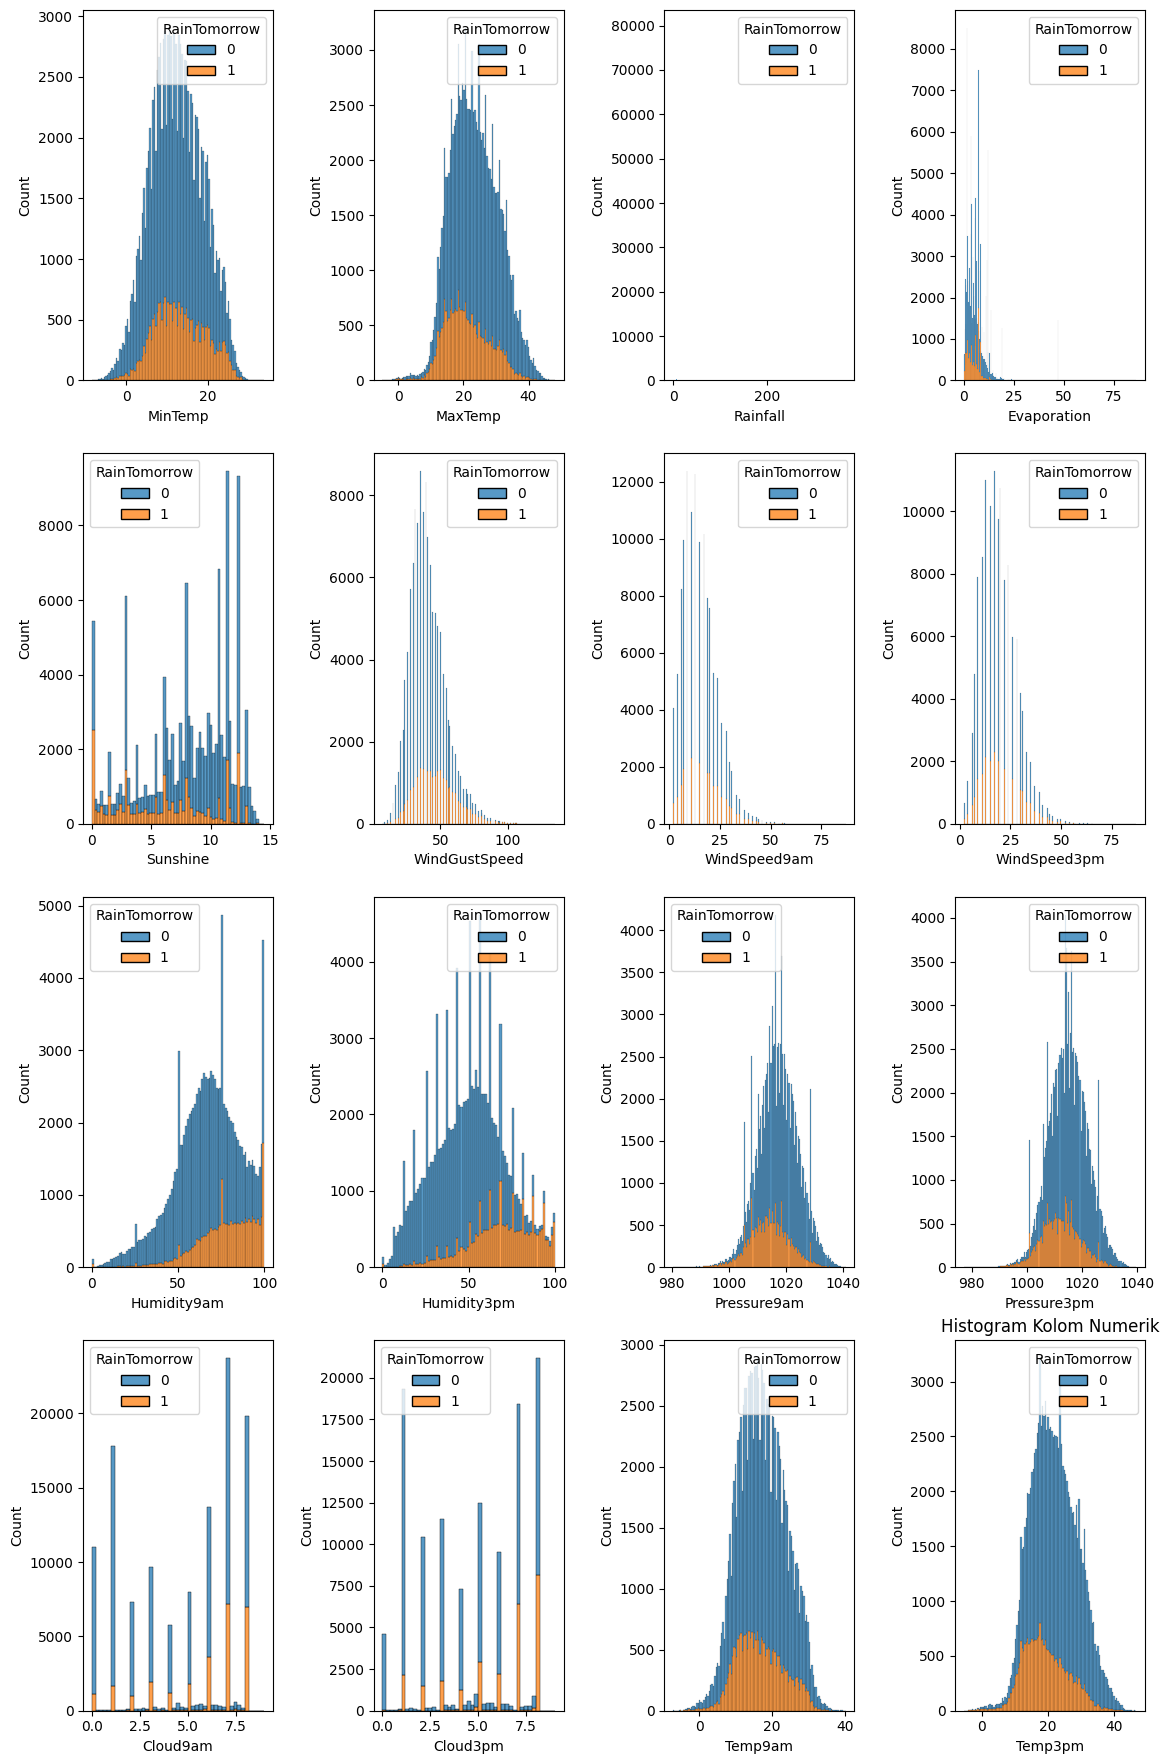

In [34]:
cols = ['MinTemp','MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm',
       'Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

fig, ax = plt.subplots(4, 4, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue='RainTomorrow', multiple='stack', ax=ax[i])

fig.tight_layout(pad=2.0)
plt.title('Histogram Kolom Numerik')

## Relasi kolom numeric dan kolom target

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, 'MinTemp'),
  Text(1.5, 0, 'MaxTemp'),
  Text(2.5, 0, 'Rainfall'),
  Text(3.5, 0, 'Evaporation'),
  Text(4.5, 0, 'Sunshine'),
  Text(5.5, 0, 'WindGustSpeed'),
  Text(6.5, 0, 'WindSpeed9am'),
  Text(7.5, 0, 'WindSpeed3pm'),
  Text(8.5, 0, 'Humidity9am'),
  Text(9.5, 0, 'Humidity3pm'),
  Text(10.5, 0, 'Pressure9am'),
  Text(11.5, 0, 'Pressure3pm'),
  Text(12.5, 0, 'Cloud9am'),
  Text(13.5, 0, 'Cloud3pm'),
  Text(14.5, 0, 'Temp9am'),
  Text(15.5, 0, 'Temp3pm'),
  Text(16.5, 0, 'RainToday'),
  Text(17.5, 0, 'RISK_MM'),
  Text(18.5, 0, 'RainTomorrow'),
  Text(19.5, 0, 'year'),
  Text(20.5, 0, 'month'),
  Text(21.5, 0, 'day')])

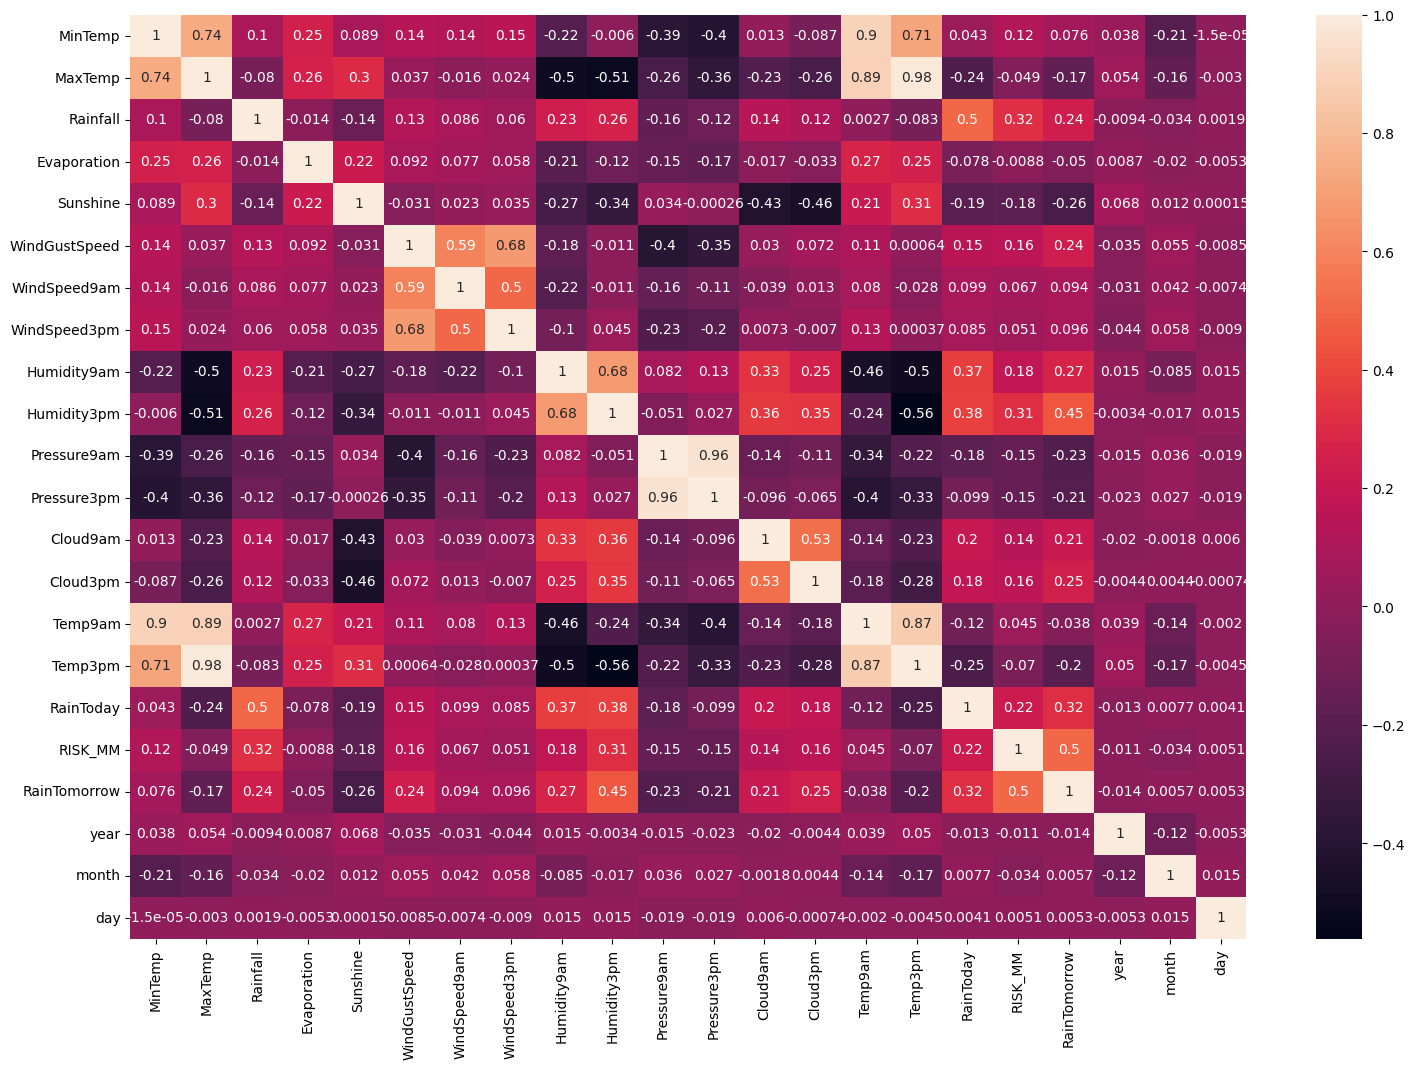

In [35]:
# Memilih kolom numerik
numeric_columns = df.select_dtypes(include=[np.number])  # Memilih kolom numerik
plt.figure(figsize=(18, 12))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.xticks(rotation=90)

# Data Preprocessing

## Menghapus kolom numerik dengan nilai koefisien korelasi rendah terhadap kolom target 

In [36]:
#prepocesing data
df.drop(['MinTemp','Evaporation','WindSpeed9am','WindSpeed3pm','Temp9am'], axis=1, inplace=True)


## Menghilangkan kolom kategorik yang diduga tidak berpengaruh signifikan terhadap kolom target

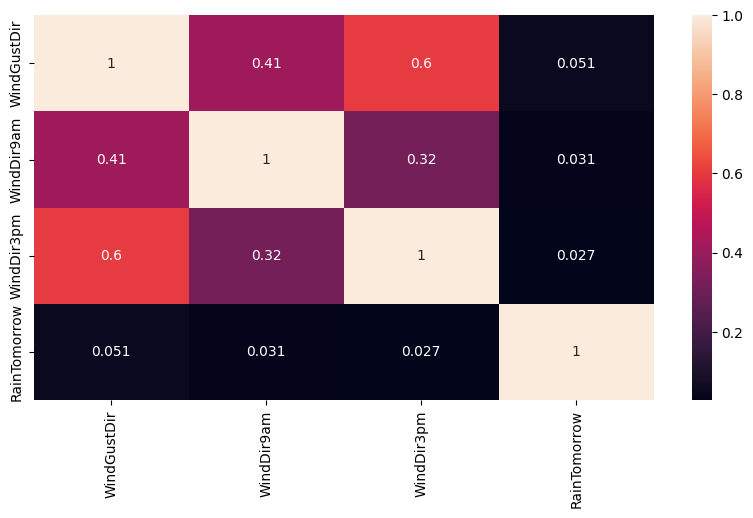

In [37]:
# Mengubah kolom kategorik menjadi kolom numerik
dff = df.copy()
cat = ['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']
le =  LabelEncoder()
for i in cat:
        dff[i] = le.fit_transform(dff[i])

dff = dff[['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]

plt.figure(figsize=(10,5))
sns.heatmap(dff.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

## Menghapus kolom dengan nilai koefisien korelasi tinggi satu sama lain 

In [38]:
df.drop(['Temp3pm','Pressure3pm'], axis=1, inplace=True)

In [39]:
# Drop kolom date, year, day karena tidak dibutuhkan
df.drop(['Date','year','day'], axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123710 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MaxTemp        123710 non-null  float64
 2   Rainfall       123710 non-null  float64
 3   Sunshine       123710 non-null  float64
 4   WindGustDir    123710 non-null  object 
 5   WindGustSpeed  123710 non-null  float64
 6   WindDir9am     123710 non-null  object 
 7   WindDir3pm     123710 non-null  object 
 8   Humidity9am    123710 non-null  float64
 9   Humidity3pm    123710 non-null  float64
 10  Pressure9am    123710 non-null  float64
 11  Cloud9am       123710 non-null  float64
 12  Cloud3pm       123710 non-null  float64
 13  RainToday      123710 non-null  int64  
 14  RISK_MM        123710 non-null  float64
 15  RainTomorrow   123710 non-null  int64  
 16  month          123710 non-null  int32  
dtypes: float64(10), int32(1), int64(2)

In [41]:
# Reset index setelah dilakukan dropping dengan tujuan agar index berurutan
df.reset_index(drop=True, inplace=True)

## Standarisasi data

In [42]:
columns = ['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm',
       'month', 'RainToday', 'RainTomorrow','Location']

In [43]:
data = df[columns]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   Sunshine       123710 non-null  float64
 3   WindGustSpeed  123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Humidity3pm    123710 non-null  float64
 6   Pressure9am    123710 non-null  float64
 7   Cloud9am       123710 non-null  float64
 8   Cloud3pm       123710 non-null  float64
 9   month          123710 non-null  int32  
 10  RainToday      123710 non-null  int64  
 11  RainTomorrow   123710 non-null  int64  
 12  Location       123710 non-null  object 
dtypes: float64(9), int32(1), int64(2), object(1)
memory usage: 11.8+ MB


In [44]:
scaler = StandardScaler()
scaler.fit(data.drop(['RainToday','RainTomorrow','Location'], axis=1))
scaled_features = scaler.transform(data.drop(['RainToday','RainTomorrow','Location'], axis=1))
df_feat = pd.DataFrame(scaled_features,columns = data.columns[:-3])
df_feat.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,month
0,-0.080075,-0.208215,1.160037,0.247578,0.174560,-1.371006,-1.349823,1.220705,-0.982267,1.602307
1,0.225132,-0.278572,1.160037,0.247578,-1.234348,-1.228013,-0.939373,1.041376,0.157780,1.602307
2,0.308370,-0.278572,1.160037,0.396959,-1.547438,-0.989691,-1.363976,1.041376,-0.982267,1.602307
3,0.627450,-0.278572,1.160037,-1.246232,-1.182166,-1.656991,0.051368,0.264284,0.157780,1.602307
4,1.223992,-0.161311,1.160037,0.023507,0.748559,-0.846699,-0.911066,0.862047,1.297827,1.602307


In [45]:
df_feat['Location'] = data['Location']
df_feat['RainToday'] = data['RainToday']

df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   Sunshine       123710 non-null  float64
 3   WindGustSpeed  123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Humidity3pm    123710 non-null  float64
 6   Pressure9am    123710 non-null  float64
 7   Cloud9am       123710 non-null  float64
 8   Cloud3pm       123710 non-null  float64
 9   month          123710 non-null  float64
 10  Location       123710 non-null  object 
 11  RainToday      123710 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 11.3+ MB


## Encoder untuk kolom `Location`

In [46]:
df_dummies = pd.get_dummies(df_feat, columns=['Location'])
df_dummies.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,month,RainToday,Location_Adelaide,Location_Albury,...,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,-0.080075,-0.208215,1.160037,0.247578,0.174560,-1.371006,-1.349823,1.220705,-0.982267,1.602307,0,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.225132,-0.278572,1.160037,0.247578,-1.234348,-1.228013,-0.939373,1.041376,0.157780,1.602307,0,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.308370,-0.278572,1.160037,0.396959,-1.547438,-0.989691,-1.363976,1.041376,-0.982267,1.602307,0,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.627450,-0.278572,1.160037,-1.246232,-1.182166,-1.656991,0.051368,0.264284,0.157780,1.602307,0,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1.223992,-0.161311,1.160037,0.023507,0.748559,-0.846699,-0.911066,0.862047,1.297827,1.602307,0,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
df_final = df_dummies.copy()

## Splitting dataset

In [48]:
X = df_final
y = df.RainTomorrow

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
print("Training set sebesar {0:0.2f}%".format(len(X_train)/len(df.index)*100))
print("Test set sebesar {0:0.2f}%".format(len(X_test)/len(df.index)*100))

Training set sebesar 70.00%
Test set sebesar 30.00%


In [51]:
print('Jumlah training set:', len(X_train))
print('Jumlah testing set:', len(X_test))

Jumlah training set: 86597
Jumlah testing set: 37113


In [52]:
print("Jumlah hari turunnya hujan: {0} ({1:2.2f}%)".format(len(df.loc[df["RainTomorrow"] == 1]), (len(df.loc[df["RainTomorrow"]==1])/len(df.index))*100.0))
print("Jumlah hari turunnya hujan : {0} ({1:2.2f}%)\n".format(len(df.loc[df["RainTomorrow"] == 0]), (len(df.loc[df["RainTomorrow"] == 0])/len(df.index))*100.0))

print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)*100.0)))
print("Training False: {0} ({1:2.2f}%)\n".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)*100.0)))

print("Testing True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)*100.0)))
print("Testing False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)*100.0)))

Jumlah hari turunnya hujan: 27392 (22.14%)
Jumlah hari turunnya hujan : 96318 (77.86%)

Training True: 19095 (22.05%)
Training False: 67502 (77.95%)

Testing True: 8297 (22.36%)
Testing False: 28816 (77.64%)


# Pendefinisian dan Pelatihan Model SVM

In [53]:
# Pendefisian Model SVM
svm = svm.SVC(class_weight='balanced', kernel='linear')

In [54]:
# Pendefisian Model SVM
svm.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [55]:
y_pred_svm = svm.predict(X_test)

# Evaluasi Model SVM

In [56]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

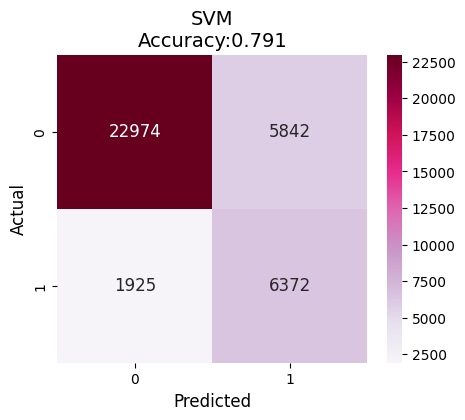

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86     28816
           1       0.52      0.77      0.62      8297

    accuracy                           0.79     37113
   macro avg       0.72      0.78      0.74     37113
weighted avg       0.83      0.79      0.80     37113

Accuracy Score: 0.790720232802522
Precision Score: 0.5216964139512036
Recall Score: 0.7679884295528504
F1 Score: 0.6213251426064064


In [57]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score: {precision_score(y_test, y_pred_svm)}')
print(f'Recall Score: {recall_score(y_test, y_pred_svm)}')
print("F1 Score:", f1_score(y_test, y_pred_svm))

# Feature Importance

In [58]:
print('Nilai Intersep model:', svm.intercept_)
print('')
print('Nilai koefisien model regresi logistik:', svm.coef_)

Nilai Intersep model: [-0.5517952]

Nilai koefisien model regresi logistik: [[ 0.1977227   0.04844937 -0.33833741  0.50909491  0.1242907   0.97034495
  -0.24685509 -0.01812964  0.16260721  0.04861771  0.32922564  0.57469161
   0.73638391  0.38008683  0.39495746 -0.00271746  0.51055681  0.37555043
  -0.16507821 -0.2363136   0.37577163 -0.04557676  0.01315644 -0.2425434
  -0.07552443 -0.25719234  0.31221598 -0.00461668 -0.12905305 -0.34014874
   0.10465599  0.24927279 -0.05366239 -1.05173613 -0.26587817  0.22017445
  -0.25749254  0.00821475  0.08317108  0.09006803  0.4047821   0.26801621
  -0.11723736 -0.76364802 -0.39709536  0.50709403  0.00384309 -0.14282265
  -0.7231139  -0.34624359  0.51593605  0.32883245 -0.19643306 -0.03972029
  -0.0049849   0.3113394  -0.67813191 -0.23180658]]


In [59]:
# Memeriksa feature importance

feature_importance=pd.DataFrame({'feature':list(df_final.columns),'feature_importance':[abs(i) for i in svm.coef_[0]]})
feature_importance

,feature,feature_importance
0,MaxTemp,0.197723
1,Rainfall,0.048449
2,Sunshine,0.338337
3,WindGustSpeed,0.509095
4,Humidity9am,0.124291
5,Humidity3pm,0.970345
6,Pressure9am,0.246855
7,Cloud9am,0.018130
8,Cloud3pm,0.162607
9,month,0.048618


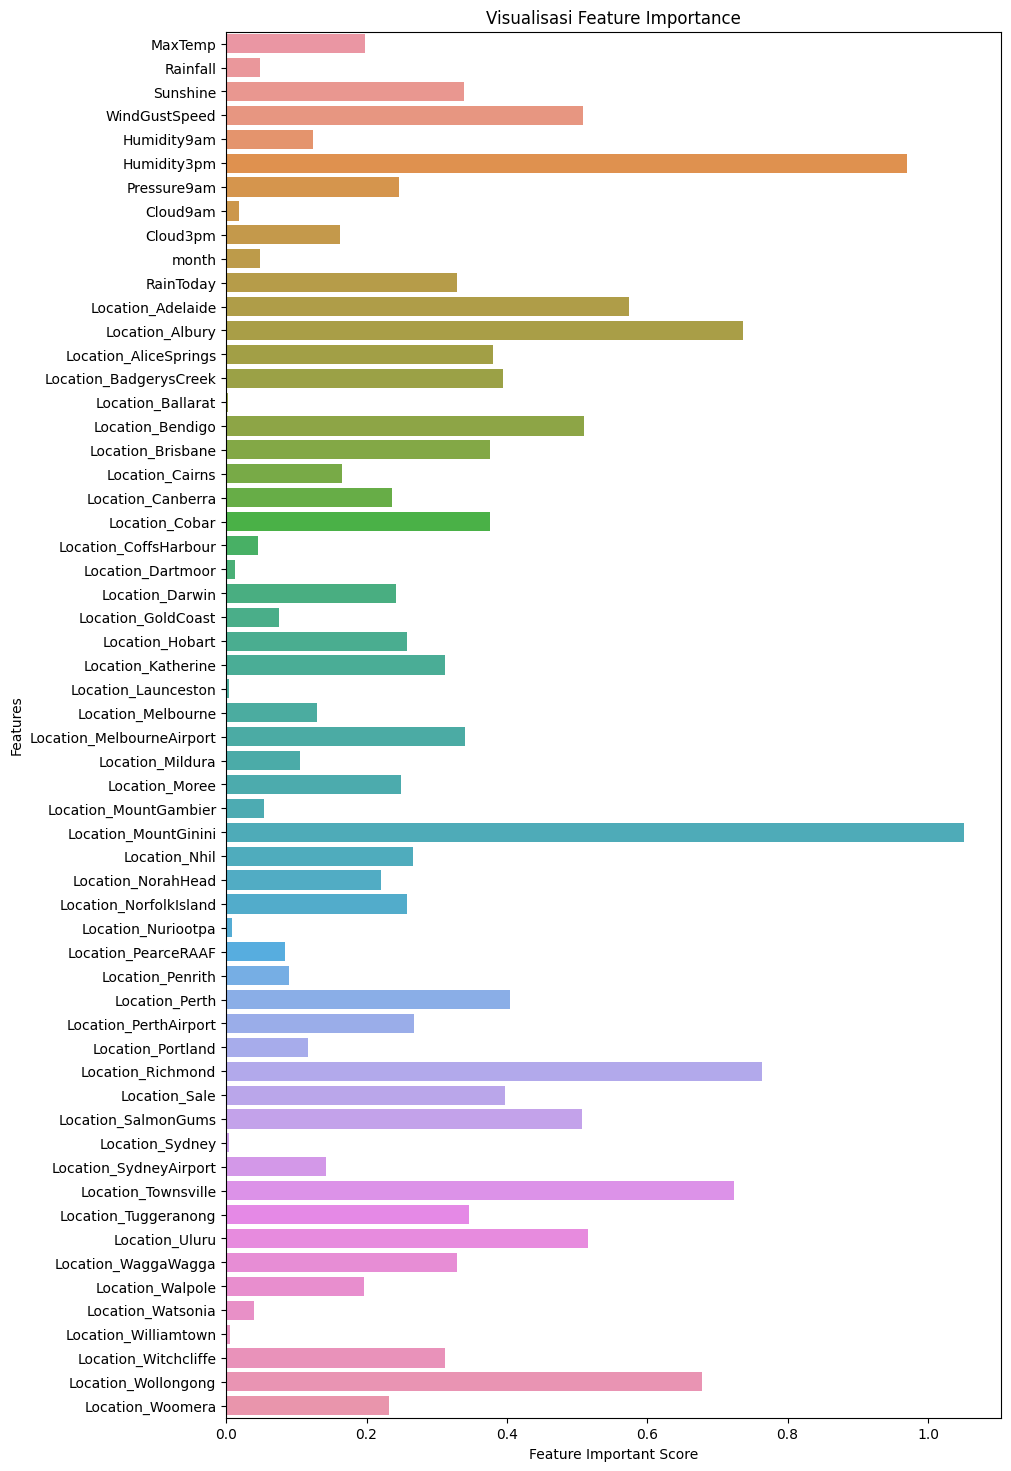

In [60]:
plt.figure(figsize=(10, 18))
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance['feature'])
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance")

plt.show()

# Membangun model SVM baru

In [61]:
data2 = data.copy()
data2.drop('Cloud9am', axis=1, inplace=True)
feature_names = list(data2.columns.values)

data2.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm,month,RainToday,RainTomorrow,Location
0,22.9,0.6,12.3,44.0,71.0,22.0,1007.7,2.0,12,0,0,Albury
1,25.1,0.0,12.3,44.0,44.0,25.0,1010.6,5.0,12,0,0,Albury
2,25.7,0.0,12.3,46.0,38.0,30.0,1007.6,2.0,12,0,0,Albury
3,28.0,0.0,12.3,24.0,45.0,16.0,1017.6,5.0,12,0,0,Albury
4,32.3,1.0,12.3,41.0,82.0,33.0,1010.8,8.0,12,0,0,Albury


In [62]:
scaler_ = StandardScaler()
scaler_.fit(data2.drop(['RainToday','RainTomorrow','Location'], axis=1))
scaled_features_ = scaler_.transform(data2.drop(['RainToday','RainTomorrow','Location'], axis=1))
df_feat_ = pd.DataFrame(scaled_features_,columns = data2.columns[:-3])
df_feat_.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm,month
0,-0.080075,-0.208215,1.160037,0.247578,0.174560,-1.371006,-1.349823,-0.982267,1.602307
1,0.225132,-0.278572,1.160037,0.247578,-1.234348,-1.228013,-0.939373,0.157780,1.602307
2,0.308370,-0.278572,1.160037,0.396959,-1.547438,-0.989691,-1.363976,-0.982267,1.602307
3,0.627450,-0.278572,1.160037,-1.246232,-1.182166,-1.656991,0.051368,0.157780,1.602307
4,1.223992,-0.161311,1.160037,0.023507,0.748559,-0.846699,-0.911066,1.297827,1.602307


In [63]:
df_feat_['Location'] = data2['Location']
df_feat_['RainToday'] = data2['RainToday']

df_feat_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   Sunshine       123710 non-null  float64
 3   WindGustSpeed  123710 non-null  float64
 4   Humidity9am    123710 non-null  float64
 5   Humidity3pm    123710 non-null  float64
 6   Pressure9am    123710 non-null  float64
 7   Cloud3pm       123710 non-null  float64
 8   month          123710 non-null  float64
 9   Location       123710 non-null  object 
 10  RainToday      123710 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 10.4+ MB


In [64]:
df_dummies_ = pd.get_dummies(df_feat_, columns=['Location'])
df_dummies_.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm,month,RainToday,Location_Adelaide,Location_Albury,Location_AliceSprings,...,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,-0.080075,-0.208215,1.160037,0.247578,0.174560,-1.371006,-1.349823,-0.982267,1.602307,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.225132,-0.278572,1.160037,0.247578,-1.234348,-1.228013,-0.939373,0.157780,1.602307,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.308370,-0.278572,1.160037,0.396959,-1.547438,-0.989691,-1.363976,-0.982267,1.602307,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.627450,-0.278572,1.160037,-1.246232,-1.182166,-1.656991,0.051368,0.157780,1.602307,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1.223992,-0.161311,1.160037,0.023507,0.748559,-0.846699,-0.911066,1.297827,1.602307,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False


# Model Inference

In [65]:
MaxTemp = float(input("Max Temperature:"))
Rainfall = float(input("Rainfall (in mm):"))
Sunshine = float(input("Sunshine hour:"))
WindGustSpeed = float(input("Wind Speed:"))
Humidity9am = float(input("Humidity percentation at 9 AM:"))
Humidity3pm = float(input("Humidity percentation at 3 PM:"))
Pressure9am = float(input("Pressure at 9 AM:"))
Cloud3pm = float(input("Cloud persentation at 3 PM:"))
Cloud9am = float(input("Cloud persentation at 9 AM :"))
month = int(input('Month:'))
RainToday = int(input('Is today raining? Please type 1 for YES and 0 for NO '))
Location = input('Your Location:')

val = [MaxTemp, Rainfall, Sunshine, WindGustSpeed, Humidity9am , Humidity3pm, Pressure9am,Cloud9am,Cloud3pm, month]
val = scaler.transform([val])
val = val.reshape(10,)

if RainToday == 1:
    val = np.append(val, 1)
elif RainToday == 0:
    val = np.append(val, 0)
else:
    print('ERROR!')


locations = {"Adelaide":0,"Albury":1,"AliceSprings":2,
            "Badgerys Creek":3,"Ballarat":4,"Bendigo":5,
            "Brisbane":6,"Cairns":7,"Canberra":8,
            "Cobar":9,"Coffs Harbour":10,"Dartmoor":11,
            "Darwin":12,"Gold Coast":13,"Hobart":14,
            "Katherine":15,"Launceston":16,"Melbourne":17,
            "Melbourne Airport":18,"Mildura":19,"Moree":20,
            "Mount Gambier":21,"Mount Ginini":22,"Nhil":23,
            "Norah Head":24,"Norfolk Island":25,"Nuriootpa":26,
            "Pearce RAAF":27,"Penrith":28,"Perth":29,
            "Perth Airport":30,"Portland":31,"Richmond":32,
            "Sale":33, "Salmon Gums":34, "Sydney":35,
            "Sydney Airport":36, "Townsville":37, "Tuggeranong":38,
            "Uluru":39, "Wagga Wagga":40, "Walpole":41, 
            "Watsonia":42, "Williamtown":43, "Witchcliffe":44,
            "Wollongong":45, "Woomera":46}

for i in range(0,47):
    if locations[Location]==i:
        val = np.append(val, 1)
    else:
        val = np.append(val, 0)

print(val)

val_predict = svm.predict([val])

if val_predict == 1:
    print('Prediksi bernilai 1, maka akan diprediksi besok turun hujan')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka akan diprediksi besok TIDAK turun hujan')
else:
    print('Prediksi tidak valid')

Max Temperature:25
Rainfall (in mm):0.5
Sunshine hour:12
Wind Speed:60
Humidity percentation at 9 AM:50
Humidity percentation at 3 PM:45
Pressure at 9 AM:100
Cloud persentation at 3 PM:7
Cloud persentation at 9 AM :5
Month:9
Is today raining? Please type 1 for YES and 0 for NO 1
Your Location:Sydney
[   0.21125888   -0.21994134    1.08045658    1.4426263    -0.92125708
   -0.27472731 -129.82059778    0.1447319     0.91781161    0.73902232
    1.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            1.            0.            0.            0.
    0.            0.            0.            0.     

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Save Model

In [66]:
pickle_file_dir = open("svm.pkl", "wb")

pickle.dump(svm, pickle_file_dir)
pickle_file_dir.close()